# 2 - MNIST CNN Network

Adapted from this tutorial -> https://victorzhou.com/blog/keras-cnn-tutorial/#the-full-code

`github.com/samph4`

~

### Preface

This example will use the same MNIST dataset as we used in the last example. However, this time we are going to train a different class of neural network. This time, we'll be using a Convolutional Neural Network (CNN). CNN's are extremely popular recently as they have revolutionised the field of computer vision as they are well equipped to deal with and process data in image format. There is an article by Victor Zhou (https://victorzhou.com/blog/intro-to-cnns-part-1/) that does an excellent job introducing what a CNN is, but I'll try and summarise his key points here.

A classic use of CNNs is to perform image classification e.g. looking at an image of a pet and determining whether it is a cat or a dog. CNN's can achieve extraordinary results in this regard and some of the most successful and popular CNN networks achieve accuracies of over 88 % on famous image databases such as ImageNet that contains over 14 million images  belonging to ~22,000 categories (where one category might be a cat). You can quickly begin to appreciate the capabilities of these networks and the tasks they might be able to perform. It is a fantastic time to get into machine learning since large improvements in the field have been made in the last 10 years: the image below shows the progression of the 'state of the art' trained networks on the ImageNet database (taken from https://paperswithcode.com/sota/image-classification-on-imagenet).

![Image](./Figures/cnn_exp.png)

Determining whether or not an image is of a cat or a dog seems straight forward, couldn't we just use a standard neural network (MLP)? The answer is yes, but it might be an extremely inefficient solution. The reason being that images can be very big (depending on pixel size). 

> "Images used for Computer Vision problems nowadays are often 224x224 or larger. Imagine building a neural network to process 224x224 color images: including the 3 color channels (RGB) in the image, that comes out to 224 x 224 x 3 = 150,528 input features! A typical hidden layer in such a network might have 1024 nodes, so we’d have to train 150,528 x 1024 = 150+ million weights for the first layer alone. Our network would be huge and nearly impossible to train." - https://victorzhou.com/blog/intro-to-cnns-part-1/.

This is exactly what we did in the previous example, where we took the 28x28 input image (MNIST digit) and flattened it to form a feature vector of 784 elements. This quickly gets out of hand with larger image sizes and as a result training times and convergence can suffer. Nor is it the most logical approach. Intuitively, when we consider an image we interpret the image based on a collection of pixels. Pixels are most useful in the context of their neighbours and as humans we gather much more information from a collection of pixels rather than isolated, indivudal colours. Objects in images are made up of small, *localised* features, like the circular iris of an eye or the square corner of a piece of paper. Doesn't it seem wasteful for every node in the first hidden layer to look at every single pixel? Could it therefore be helpful to try and create something that adopts similar practicices? Also, positions can change. And this is particularly important. If we train a network that is capable of identifying a cat, we would want the model to be able to detect that cat regardless of where it appears in the image.

> "Imagine training a network that works well on a certain dog image, but then feeding it a slightly shifted version of the same image. The dog would not activate the same neurons, so the network would react completely differently!". - https://victorzhou.com/blog/intro-to-cnns-part-1/.

We did not run into this problem in the previous example since the MNIST dataset had been structured for us. The dataset contains small images (low # of pixels = low # of features) that, more imporantly, had been centered so we did not encounter the issue of shifting or funky orientations.

~

## What are CNNs?

![Image](./Figures/cnn.jpeg)

~ bunch of text about how they work - refer to video honestly.

In [1]:
!pip install mnist

#### Necessary Imports

In [2]:
import numpy as np 
from tensorflow import keras 
#from keras.datasets import mnist
import mnist # import mnist directly to access more info
import matplotlib.pyplot as plt

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Before we begin, we’ll normalize the image pixel values from [0, 255] to [-0.5, 0.5] to make our network easier to train (using smaller, centered values usually leads to better results). We’ll also reshape each image from (28, 28) to (28, 28, 1) because Keras requires the third dimension.

In [4]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential()

model.add(Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras.utils import to_categorical

model.fit(train_images,to_categorical(train_labels), epochs=3,validation_data=(test_images, to_categorical(test_labels)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3


   32/60000 [..............................] - ETA: 54:54 - loss: 2.3718 - accuracy: 0.0312

 1056/60000 [..............................] - ETA: 1:40 - loss: 2.0454 - accuracy: 0.3466 

 2016/60000 [>.............................] - ETA: 53s - loss: 1.7237 - accuracy: 0.5268 

 3040/60000 [>.............................] - ETA: 35s - loss: 1.4495 - accuracy: 0.6118

 4032/60000 [=>............................] - ETA: 27s - loss: 1.2493 - accuracy: 0.6652

 5024/60000 [=>............................] - ETA: 22s - loss: 1.1057 - accuracy: 0.7016

 6016/60000 [==>...........................] - ETA: 18s - loss: 1.0050 - accuracy: 0.7269

 6880/60000 [==>...........................] - ETA: 16s - loss: 0.9356 - accuracy: 0.7448

 7776/60000 [==>...........................] - ETA: 14s - loss: 0.8790 - accuracy: 0.7595

 8608/60000 [===>..........................] - ETA: 13s - loss: 0.8333 - accuracy: 0.7709

 9632/60000 [===>..........................] - ETA: 11s - loss: 0.7898 - accuracy: 0.7825



10592/60000 [====>.........................] - ETA: 10s - loss: 0.7564 - accuracy: 0.7908

11520/60000 [====>.........................] - ETA: 9s - loss: 0.7253 - accuracy: 0.7990 

12512/60000 [=====>........................] - ETA: 9s - loss: 0.7001 - accuracy: 0.8045

13472/60000 [=====>........................] - ETA: 8s - loss: 0.6755 - accuracy: 0.8106

14400/60000 [======>.......................] - ETA: 8s - loss: 0.6564 - accuracy: 0.8155

15296/60000 [======>.......................] - ETA: 7s - loss: 0.6393 - accuracy: 0.8200

16000/60000 [=======>......................] - ETA: 7s - loss: 0.6253 - accuracy: 0.8229

16768/60000 [=======>......................] - ETA: 6s - loss: 0.6117 - accuracy: 0.8263

17664/60000 [=======>......................] - ETA: 6s - loss: 0.5983 - accuracy: 0.8299

18528/60000 [========>.....................] - ETA: 6s - loss: 0.5861 - accuracy: 0.8326

19232/60000 [========>.....................] - ETA: 6s - loss: 0.5743 - accuracy: 0.8355

20000/60000 [=========>....................] - ETA: 5s - loss: 0.5673 - accuracy: 0.8375

20896/60000 [=========>....................] - ETA: 5s - loss: 0.5570 - accuracy: 0.8403



21664/60000 [=========>....................] - ETA: 5s - loss: 0.5496 - accuracy: 0.8426

22176/60000 [==========>...................] - ETA: 5s - loss: 0.5434 - accuracy: 0.8442

22720/60000 [==========>...................] - ETA: 5s - loss: 0.5372 - accuracy: 0.8459

23328/60000 [==========>...................] - ETA: 4s - loss: 0.5311 - accuracy: 0.8476

23840/60000 [==========>...................] - ETA: 4s - loss: 0.5261 - accuracy: 0.8493

24384/60000 [===========>..................] - ETA: 4s - loss: 0.5211 - accuracy: 0.8507

25088/60000 [===========>..................] - ETA: 4s - loss: 0.5142 - accuracy: 0.8526

25600/60000 [===========>..................] - ETA: 4s - loss: 0.5107 - accuracy: 0.8536

26272/60000 [============>.................] - ETA: 4s - loss: 0.5072 - accuracy: 0.8547

26912/60000 [============>.................] - ETA: 4s - loss: 0.5036 - accuracy: 0.8553

27648/60000 [============>.................] - ETA: 4s - loss: 0.4994 - accuracy: 0.8566

28352/60000 [=============>................] - ETA: 3s - loss: 0.4942 - accuracy: 0.8579

29088/60000 [=============>................] - ETA: 3s - loss: 0.4906 - accuracy: 0.8588

29856/60000 [=============>................] - ETA: 3s - loss: 0.4839 - accuracy: 0.8606

30528/60000 [==============>...............] - ETA: 3s - loss: 0.4793 - accuracy: 0.8618

31040/60000 [==============>...............] - ETA: 3s - loss: 0.4757 - accuracy: 0.8629



31488/60000 [==============>...............] - ETA: 3s - loss: 0.4732 - accuracy: 0.8636

32320/60000 [===============>..............] - ETA: 3s - loss: 0.4685 - accuracy: 0.8651

33088/60000 [===============>..............] - ETA: 3s - loss: 0.4647 - accuracy: 0.8661

33888/60000 [===============>..............] - ETA: 3s - loss: 0.4609 - accuracy: 0.8672

34592/60000 [================>.............] - ETA: 2s - loss: 0.4562 - accuracy: 0.8686

35264/60000 [================>.............] - ETA: 2s - loss: 0.4530 - accuracy: 0.8696

36032/60000 [=================>............] - ETA: 2s - loss: 0.4506 - accuracy: 0.8701

36768/60000 [=================>............] - ETA: 2s - loss: 0.4468 - accuracy: 0.8711

37728/60000 [=================>............] - ETA: 2s - loss: 0.4428 - accuracy: 0.8723

38624/60000 [==================>...........] - ETA: 2s - loss: 0.4388 - accuracy: 0.8735

39456/60000 [==================>...........] - ETA: 2s - loss: 0.4357 - accuracy: 0.8745

40000/60000 [===================>..........] - ETA: 2s - loss: 0.4338 - accuracy: 0.8750

40832/60000 [===================>..........] - ETA: 2s - loss: 0.4299 - accuracy: 0.8762

41632/60000 [===================>..........] - ETA: 1s - loss: 0.4262 - accuracy: 0.8770

42400/60000 [====================>.........] - ETA: 1s - loss: 0.4241 - accuracy: 0.8779

43264/60000 [====================>.........] - ETA: 1s - loss: 0.4213 - accuracy: 0.8788



43968/60000 [====================>.........] - ETA: 1s - loss: 0.4187 - accuracy: 0.8796

44736/60000 [=====================>........] - ETA: 1s - loss: 0.4161 - accuracy: 0.8802

45472/60000 [=====================>........] - ETA: 1s - loss: 0.4134 - accuracy: 0.8811

46048/60000 [======================>.......] - ETA: 1s - loss: 0.4114 - accuracy: 0.8814

46816/60000 [======================>.......] - ETA: 1s - loss: 0.4091 - accuracy: 0.8820

47680/60000 [======================>.......] - ETA: 1s - loss: 0.4060 - accuracy: 0.8827

48416/60000 [=======================>......] - ETA: 1s - loss: 0.4034 - accuracy: 0.8836

49184/60000 [=======================>......] - ETA: 1s - loss: 0.4014 - accuracy: 0.8842

49952/60000 [=======================>......] - ETA: 1s - loss: 0.3999 - accuracy: 0.8846

50720/60000 [========================>.....] - ETA: 0s - loss: 0.3973 - accuracy: 0.8854

51488/60000 [========================>.....] - ETA: 0s - loss: 0.3946 - accuracy: 0.8861

52352/60000 [=========================>....] - ETA: 0s - loss: 0.3921 - accuracy: 0.8868

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3894 - accuracy: 0.8876

54112/60000 [==========================>...] - ETA: 0s - loss: 0.3876 - accuracy: 0.8882

55104/60000 [==========================>...] - ETA: 0s - loss: 0.3856 - accuracy: 0.8889

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3828 - accuracy: 0.8898

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3811 - accuracy: 0.8903



57728/60000 [===========================>..] - ETA: 0s - loss: 0.3787 - accuracy: 0.8909

58528/60000 [============================>.] - ETA: 0s - loss: 0.3767 - accuracy: 0.8914

59072/60000 [============================>.] - ETA: 0s - loss: 0.3764 - accuracy: 0.8915

59936/60000 [============================>.] - ETA: 0s - loss: 0.3743 - accuracy: 0.8922

60000/60000 [==============================] - 6s 107us/sample - loss: 0.3740 - accuracy: 0.8923 - val_loss: 0.2247 - val_accuracy: 0.9352


Epoch 2/3
   32/60000 [..............................] - ETA: 7s - loss: 0.3398 - accuracy: 0.8750

  960/60000 [..............................] - ETA: 3s - loss: 0.2561 - accuracy: 0.9385

 1824/60000 [..............................] - ETA: 3s - loss: 0.2571 - accuracy: 0.9348

 2752/60000 [>.............................] - ETA: 3s - loss: 0.2490 - accuracy: 0.9306

 3680/60000 [>.............................] - ETA: 3s - loss: 0.2490 - accuracy: 0.9302

 4640/60000 [=>............................] - ETA: 3s - loss: 0.2350 - accuracy: 0.9341

 5600/60000 [=>............................] - ETA: 3s - loss: 0.2417 - accuracy: 0.9320

 6528/60000 [==>...........................] - ETA: 2s - loss: 0.2384 - accuracy: 0.9338

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2365 - accuracy: 0.9348

 7968/60000 [==>...........................] - ETA: 3s - loss: 0.2336 - accuracy: 0.9362

 8864/60000 [===>..........................] - ETA: 3s - loss: 0.2307 - accuracy: 0.9366

 9760/60000 [===>..........................] - ETA: 2s - loss: 0.2302 - accuracy: 0.9369

10656/60000 [====>.........................] - ETA: 2s - loss: 0.2278 - accuracy: 0.9370

11360/60000 [====>.........................] - ETA: 2s - loss: 0.2294 - accuracy: 0.9366

11936/60000 [====>.........................] - ETA: 2s - loss: 0.2274 - accuracy: 0.9370

12352/60000 [=====>........................] - ETA: 2s - loss: 0.2283 - accuracy: 0.9371

12768/60000 [=====>........................] - ETA: 3s - loss: 0.2276 - accuracy: 0.9371

13152/60000 [=====>........................] - ETA: 3s - loss: 0.2261 - accuracy: 0.9375

13664/60000 [=====>........................] - ETA: 3s - loss: 0.2263 - accuracy: 0.9374

14496/60000 [======>.......................] - ETA: 3s - loss: 0.2252 - accuracy: 0.9376



15392/60000 [======>.......................] - ETA: 3s - loss: 0.2234 - accuracy: 0.9380

16352/60000 [=======>......................] - ETA: 2s - loss: 0.2220 - accuracy: 0.9374

17344/60000 [=======>......................] - ETA: 2s - loss: 0.2203 - accuracy: 0.9377

18464/60000 [========>.....................] - ETA: 2s - loss: 0.2207 - accuracy: 0.9379



19584/60000 [========>.....................] - ETA: 2s - loss: 0.2204 - accuracy: 0.9379

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2192 - accuracy: 0.9382

21856/60000 [=========>....................] - ETA: 2s - loss: 0.2183 - accuracy: 0.9387

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2176 - accuracy: 0.9389

23616/60000 [==========>...................] - ETA: 2s - loss: 0.2191 - accuracy: 0.9384

24544/60000 [===========>..................] - ETA: 2s - loss: 0.2193 - accuracy: 0.9381

25504/60000 [===========>..................] - ETA: 2s - loss: 0.2166 - accuracy: 0.9387

26336/60000 [============>.................] - ETA: 2s - loss: 0.2155 - accuracy: 0.9390

27072/60000 [============>.................] - ETA: 2s - loss: 0.2150 - accuracy: 0.9392

27840/60000 [============>.................] - ETA: 1s - loss: 0.2140 - accuracy: 0.9394

28672/60000 [=============>................] - ETA: 1s - loss: 0.2138 - accuracy: 0.9397

29568/60000 [=============>................] - ETA: 1s - loss: 0.2136 - accuracy: 0.9396

30272/60000 [==============>...............] - ETA: 1s - loss: 0.2130 - accuracy: 0.9395

31136/60000 [==============>...............] - ETA: 1s - loss: 0.2122 - accuracy: 0.9396

32032/60000 [===============>..............] - ETA: 1s - loss: 0.2104 - accuracy: 0.9399

32992/60000 [===============>..............] - ETA: 1s - loss: 0.2093 - accuracy: 0.9403

33856/60000 [===============>..............] - ETA: 1s - loss: 0.2087 - accuracy: 0.9405

34880/60000 [================>.............] - ETA: 1s - loss: 0.2078 - accuracy: 0.9408

35872/60000 [================>.............] - ETA: 1s - loss: 0.2079 - accuracy: 0.9408

36896/60000 [=================>............] - ETA: 1s - loss: 0.2062 - accuracy: 0.9411

37952/60000 [=================>............] - ETA: 1s - loss: 0.2055 - accuracy: 0.9411

38304/60000 [==================>...........] - ETA: 1s - loss: 0.2057 - accuracy: 0.9410

38688/60000 [==================>...........] - ETA: 1s - loss: 0.2052 - accuracy: 0.9411

39232/60000 [==================>...........] - ETA: 1s - loss: 0.2048 - accuracy: 0.9411

40160/60000 [===================>..........] - ETA: 1s - loss: 0.2050 - accuracy: 0.9413

40928/60000 [===================>..........] - ETA: 1s - loss: 0.2052 - accuracy: 0.9411

41536/60000 [===================>..........] - ETA: 1s - loss: 0.2045 - accuracy: 0.9413

42176/60000 [====================>.........] - ETA: 1s - loss: 0.2046 - accuracy: 0.9413

42944/60000 [====================>.........] - ETA: 1s - loss: 0.2041 - accuracy: 0.9414

43840/60000 [====================>.........] - ETA: 1s - loss: 0.2033 - accuracy: 0.9417

44608/60000 [=====================>........] - ETA: 0s - loss: 0.2026 - accuracy: 0.9420

45280/60000 [=====================>........] - ETA: 0s - loss: 0.2023 - accuracy: 0.9421

45952/60000 [=====================>........] - ETA: 0s - loss: 0.2023 - accuracy: 0.9422

46816/60000 [======================>.......] - ETA: 0s - loss: 0.2018 - accuracy: 0.9424

47648/60000 [======================>.......] - ETA: 0s - loss: 0.2010 - accuracy: 0.9427

48448/60000 [=======================>......] - ETA: 0s - loss: 0.2003 - accuracy: 0.9428

49184/60000 [=======================>......] - ETA: 0s - loss: 0.2000 - accuracy: 0.9428

50016/60000 [========================>.....] - ETA: 0s - loss: 0.1989 - accuracy: 0.9431

50560/60000 [========================>.....] - ETA: 0s - loss: 0.1987 - accuracy: 0.9432

51136/60000 [========================>.....] - ETA: 0s - loss: 0.1984 - accuracy: 0.9433

51776/60000 [========================>.....] - ETA: 0s - loss: 0.1979 - accuracy: 0.9434

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1969 - accuracy: 0.9436

52832/60000 [=========================>....] - ETA: 0s - loss: 0.1969 - accuracy: 0.9435

53600/60000 [=========================>....] - ETA: 0s - loss: 0.1960 - accuracy: 0.9438

54240/60000 [==========================>...] - ETA: 0s - loss: 0.1957 - accuracy: 0.9438

55072/60000 [==========================>...] - ETA: 0s - loss: 0.1956 - accuracy: 0.9439

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1954 - accuracy: 0.9440

56960/60000 [===========================>..] - ETA: 0s - loss: 0.1951 - accuracy: 0.9441

58016/60000 [============================>.] - ETA: 0s - loss: 0.1945 - accuracy: 0.9444

59168/60000 [============================>.] - ETA: 0s - loss: 0.1939 - accuracy: 0.9447

60000/60000 [==============================] - 5s 81us/sample - loss: 0.1931 - accuracy: 0.9448 - val_loss: 0.1503 - val_accuracy: 0.9592


Epoch 3/3
   32/60000 [..............................] - ETA: 3s - loss: 0.0849 - accuracy: 0.9688

  800/60000 [..............................] - ETA: 3s - loss: 0.1419 - accuracy: 0.9575

 1600/60000 [..............................] - ETA: 3s - loss: 0.1366 - accuracy: 0.9588

 2336/60000 [>.............................] - ETA: 3s - loss: 0.1374 - accuracy: 0.9589

 3136/60000 [>.............................] - ETA: 3s - loss: 0.1335 - accuracy: 0.9595

 3968/60000 [>.............................] - ETA: 3s - loss: 0.1371 - accuracy: 0.9584

 4768/60000 [=>............................] - ETA: 3s - loss: 0.1356 - accuracy: 0.9587

 5504/60000 [=>............................] - ETA: 3s - loss: 0.1372 - accuracy: 0.9582

 6240/60000 [==>...........................] - ETA: 3s - loss: 0.1397 - accuracy: 0.9580

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.1435 - accuracy: 0.9570

 7328/60000 [==>...........................] - ETA: 3s - loss: 0.1437 - accuracy: 0.9566

 7776/60000 [==>...........................] - ETA: 3s - loss: 0.1419 - accuracy: 0.9576

 8480/60000 [===>..........................] - ETA: 3s - loss: 0.1438 - accuracy: 0.9572

 9152/60000 [===>..........................] - ETA: 3s - loss: 0.1458 - accuracy: 0.9571

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1432 - accuracy: 0.9575

10848/60000 [====>.........................] - ETA: 3s - loss: 0.1416 - accuracy: 0.9578

11584/60000 [====>.........................] - ETA: 3s - loss: 0.1414 - accuracy: 0.9580

12320/60000 [=====>........................] - ETA: 3s - loss: 0.1417 - accuracy: 0.9582

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1410 - accuracy: 0.9583

13472/60000 [=====>........................] - ETA: 3s - loss: 0.1431 - accuracy: 0.9578

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1430 - accuracy: 0.9576

14560/60000 [======>.......................] - ETA: 3s - loss: 0.1431 - accuracy: 0.9576

15040/60000 [======>.......................] - ETA: 3s - loss: 0.1438 - accuracy: 0.9577

15488/60000 [======>.......................] - ETA: 3s - loss: 0.1423 - accuracy: 0.9582

16352/60000 [=======>......................] - ETA: 3s - loss: 0.1425 - accuracy: 0.9584

17024/60000 [=======>......................] - ETA: 3s - loss: 0.1427 - accuracy: 0.9587

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1446 - accuracy: 0.9580

18912/60000 [========>.....................] - ETA: 3s - loss: 0.1431 - accuracy: 0.9583

19904/60000 [========>.....................] - ETA: 2s - loss: 0.1429 - accuracy: 0.9586

20896/60000 [=========>....................] - ETA: 2s - loss: 0.1427 - accuracy: 0.9587

21952/60000 [=========>....................] - ETA: 2s - loss: 0.1426 - accuracy: 0.9587

22944/60000 [==========>...................] - ETA: 2s - loss: 0.1434 - accuracy: 0.9581

23872/60000 [==========>...................] - ETA: 2s - loss: 0.1429 - accuracy: 0.9586

24864/60000 [===========>..................] - ETA: 2s - loss: 0.1427 - accuracy: 0.9586

25920/60000 [===========>..................] - ETA: 2s - loss: 0.1410 - accuracy: 0.9590

26816/60000 [============>.................] - ETA: 2s - loss: 0.1409 - accuracy: 0.9593

27680/60000 [============>.................] - ETA: 2s - loss: 0.1409 - accuracy: 0.9593

28608/60000 [=============>................] - ETA: 2s - loss: 0.1415 - accuracy: 0.9592

29440/60000 [=============>................] - ETA: 2s - loss: 0.1409 - accuracy: 0.9594

30368/60000 [==============>...............] - ETA: 1s - loss: 0.1418 - accuracy: 0.9591



31264/60000 [==============>...............] - ETA: 1s - loss: 0.1415 - accuracy: 0.9595

32192/60000 [===============>..............] - ETA: 1s - loss: 0.1417 - accuracy: 0.9592

33120/60000 [===============>..............] - ETA: 1s - loss: 0.1415 - accuracy: 0.9593

34080/60000 [================>.............] - ETA: 1s - loss: 0.1406 - accuracy: 0.9596

34976/60000 [================>.............] - ETA: 1s - loss: 0.1398 - accuracy: 0.9599

35840/60000 [================>.............] - ETA: 1s - loss: 0.1388 - accuracy: 0.9602

36736/60000 [=================>............] - ETA: 1s - loss: 0.1388 - accuracy: 0.9603

37728/60000 [=================>............] - ETA: 1s - loss: 0.1389 - accuracy: 0.9603

38560/60000 [==================>...........] - ETA: 1s - loss: 0.1391 - accuracy: 0.9602

39488/60000 [==================>...........] - ETA: 1s - loss: 0.1385 - accuracy: 0.9604

40384/60000 [===================>..........] - ETA: 1s - loss: 0.1380 - accuracy: 0.9604

41344/60000 [===================>..........] - ETA: 1s - loss: 0.1381 - accuracy: 0.9605

42336/60000 [====================>.........] - ETA: 1s - loss: 0.1374 - accuracy: 0.9608

43328/60000 [====================>.........] - ETA: 1s - loss: 0.1373 - accuracy: 0.9608

44160/60000 [=====================>........] - ETA: 0s - loss: 0.1373 - accuracy: 0.9609

45024/60000 [=====================>........] - ETA: 0s - loss: 0.1369 - accuracy: 0.9610

45952/60000 [=====================>........] - ETA: 0s - loss: 0.1364 - accuracy: 0.9612

46720/60000 [======================>.......] - ETA: 0s - loss: 0.1365 - accuracy: 0.9612

47456/60000 [======================>.......] - ETA: 0s - loss: 0.1360 - accuracy: 0.9613

48320/60000 [=======================>......] - ETA: 0s - loss: 0.1363 - accuracy: 0.9611

49248/60000 [=======================>......] - ETA: 0s - loss: 0.1359 - accuracy: 0.9612

49984/60000 [=======================>......] - ETA: 0s - loss: 0.1357 - accuracy: 0.9611

50848/60000 [========================>.....] - ETA: 0s - loss: 0.1351 - accuracy: 0.9612

51904/60000 [========================>.....] - ETA: 0s - loss: 0.1352 - accuracy: 0.9612

52832/60000 [=========================>....] - ETA: 0s - loss: 0.1350 - accuracy: 0.9611

53696/60000 [=========================>....] - ETA: 0s - loss: 0.1349 - accuracy: 0.9611

54656/60000 [==========================>...] - ETA: 0s - loss: 0.1350 - accuracy: 0.9611

55456/60000 [==========================>...] - ETA: 0s - loss: 0.1348 - accuracy: 0.9612

56448/60000 [===========================>..] - ETA: 0s - loss: 0.1348 - accuracy: 0.9612



57440/60000 [===========================>..] - ETA: 0s - loss: 0.1344 - accuracy: 0.9613

58432/60000 [============================>.] - ETA: 0s - loss: 0.1346 - accuracy: 0.9613

59456/60000 [============================>.] - ETA: 0s - loss: 0.1340 - accuracy: 0.9616

60000/60000 [==============================] - 4s 71us/sample - loss: 0.1339 - accuracy: 0.9617 - val_loss: 0.1114 - val_accuracy: 0.9680


# Test

In [9]:
# Test the model after training
test_results = model.evaluate(test_images, to_categorical(test_labels), verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

   32/10000 [..............................] - ETA: 2s - loss: 0.1607 - accuracy: 0.9375

 1024/10000 [==>...........................] - ETA: 0s - loss: 0.1186 - accuracy: 0.9629

 2080/10000 [=====>........................] - ETA: 0s - loss: 0.1430 - accuracy: 0.9577



 3136/10000 [========>.....................] - ETA: 0s - loss: 0.1428 - accuracy: 0.9589

 4160/10000 [===========>..................] - ETA: 0s - loss: 0.1448 - accuracy: 0.9570

 5152/10000 [==============>...............] - ETA: 0s - loss: 0.1420 - accuracy: 0.9571

 6144/10000 [=================>............] - ETA: 0s - loss: 0.1319 - accuracy: 0.9611

 7200/10000 [====================>.........] - ETA: 0s - loss: 0.1234 - accuracy: 0.9639

 8224/10000 [=======================>......] - ETA: 0s - loss: 0.1184 - accuracy: 0.9652



 9280/10000 [==========================>...] - ETA: 0s - loss: 0.1113 - accuracy: 0.9679



10000/10000 [==============================] - 1s 50us/sample - loss: 0.1114 - accuracy: 0.9680


Test results - Loss: 0.11143004224672913 - Accuracy: 96.79999947547913%


In [10]:
predictions = model.predict(test_images[:5])

In [11]:
predictions

array([[4.5093307e-06, 3.7049681e-08, 9.3209546e-06, 1.8338022e-03,
        2.3269852e-06, 5.3734942e-07, 1.2053504e-09, 9.9814367e-01,
        5.2022227e-07, 5.2704386e-06],
       [1.3307045e-04, 8.5852735e-06, 9.9793386e-01, 3.7601459e-04,
        6.3211103e-10, 2.5985442e-04, 1.0677038e-03, 9.3743823e-12,
        2.2090079e-04, 4.0182297e-08],
       [6.3252286e-05, 9.9464756e-01, 1.4061902e-03, 1.0766083e-04,
        5.2136579e-04, 1.0922305e-04, 2.6466421e-04, 2.7453853e-03,
        1.1728801e-04, 1.7568831e-05],
       [9.9378312e-01, 1.4973410e-06, 3.8805217e-03, 2.1274314e-05,
        1.5977839e-05, 1.3236875e-03, 7.4304704e-04, 5.4122429e-05,
        1.7835942e-05, 1.5896396e-04],
       [3.8882997e-04, 4.2560118e-06, 3.8960707e-04, 1.4248386e-05,
        9.9724764e-01, 1.0700307e-05, 9.4676368e-05, 5.9931591e-04,
        1.5145185e-05, 1.2354824e-03]], dtype=float32)

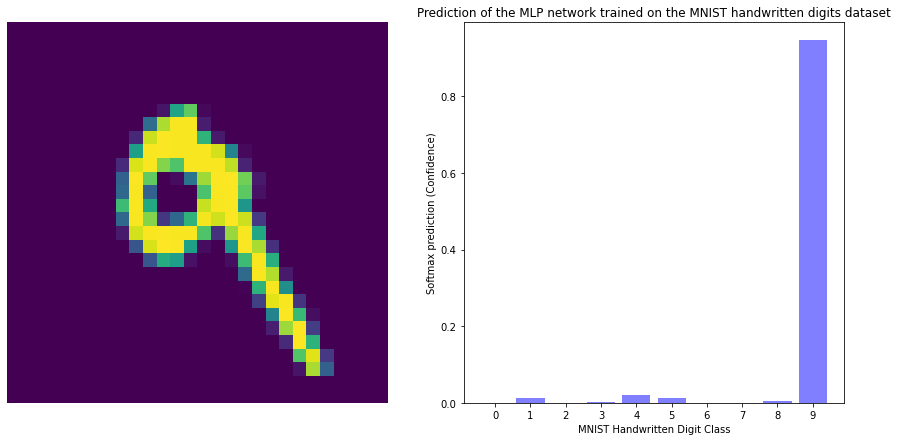

In [12]:
# create subplot to show input and its prediction
plt.figure(figsize=(15,7))

index = 7
test_input = test_images[index,:,:]


# MNIST test input (1st subplot)
plt.subplot(1,2,1)
plt.imshow(test_input.reshape(28,28))
plt.axis('off')

# bar chart (2nd subplot)
plt.subplot(1,2,2)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# prepare input to cnn
cnn_test_input = test_images[index]
cnn_test_input = cnn_test_input.reshape(1,28,28,1)
prediction = model.predict(cnn_test_input)
prediction = prediction[0,:].tolist() # convert prediction array into list to plot on chart

plt.bar(class_names, prediction, align='center', alpha=0.5, color='blue')
plt.xticks(class_names, class_names)
plt.xlabel('MNIST Handwritten Digit Class')
plt.ylabel('Softmax prediction (Confidence)')
plt.title('Prediction of the MLP network trained on the MNIST handwritten digits dataset')

plt.show()